<a href="https://colab.research.google.com/github/lokeshmanyam/unit-converter/blob/main/taxifare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
taxifare=pd.read_csv("/TaxiFare (3).csv")

In [4]:
taxifare.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
taxifare.tail(7)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49993,27:00.0,7.3,2011-04-07 14:27:00 UTC,-73.982363,40.765060,-73.969167,40.761268,1
49994,57:00.0,8.5,2012-10-13 19:57:00 UTC,-73.976212,40.744832,-73.981567,40.724635,1
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [6]:
taxifare.shape

(50000, 8)

In [7]:
taxifare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [10]:
taxifare.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [11]:
taxifare.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [16]:
taxifare['unique_id']=taxifare['unique_id'].replace('[^\d.]','',regex=True).astype(float)

In [17]:
taxifare

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,2621.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,5216.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,3500.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3042.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5100.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2515.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,1918.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,5300.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,900.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [18]:
taxifare.dtypes

unique_id               float64
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [21]:
taxifare['date_time_of_pickup']=taxifare['date_time_of_pickup'].replace('[^\d.]','',regex=True).astype(float)
taxifare

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,2621.0,4.5,2.009062e+13,-73.844311,40.721319,-73.841610,40.712278,1
1,5216.0,16.9,2.010011e+13,-74.016048,40.711303,-73.979268,40.782004,1
2,3500.0,5.7,2.011082e+13,-73.982738,40.761270,-73.991242,40.750562,2
3,3042.0,7.7,2.012042e+13,-73.987130,40.733143,-73.991567,40.758092,1
4,5100.0,5.3,2.010031e+13,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2515.0,15.0,2.013061e+13,-73.999973,40.748531,-74.016899,40.705993,1
49996,1918.0,7.5,2.015062e+13,-73.984756,40.768211,-73.987366,40.760597,1
49997,5300.0,6.9,2.011013e+13,-74.002698,40.739428,-73.998108,40.759483,1
49998,900.0,4.5,2.012111e+13,-73.946062,40.777567,-73.953450,40.779687,2


In [22]:
taxifare.dtypes

unique_id               float64
amount                  float64
date_time_of_pickup     float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [23]:
duplicate=taxifare.duplicated()
duplicate.sum()

0

<Axes: xlabel='unique_id'>

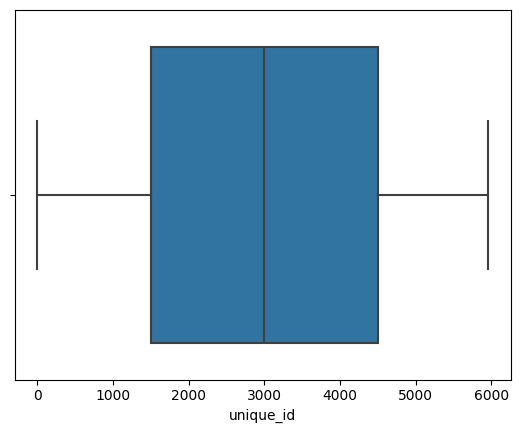

In [26]:
sns.boxplot(x='unique_id',data=taxifare)

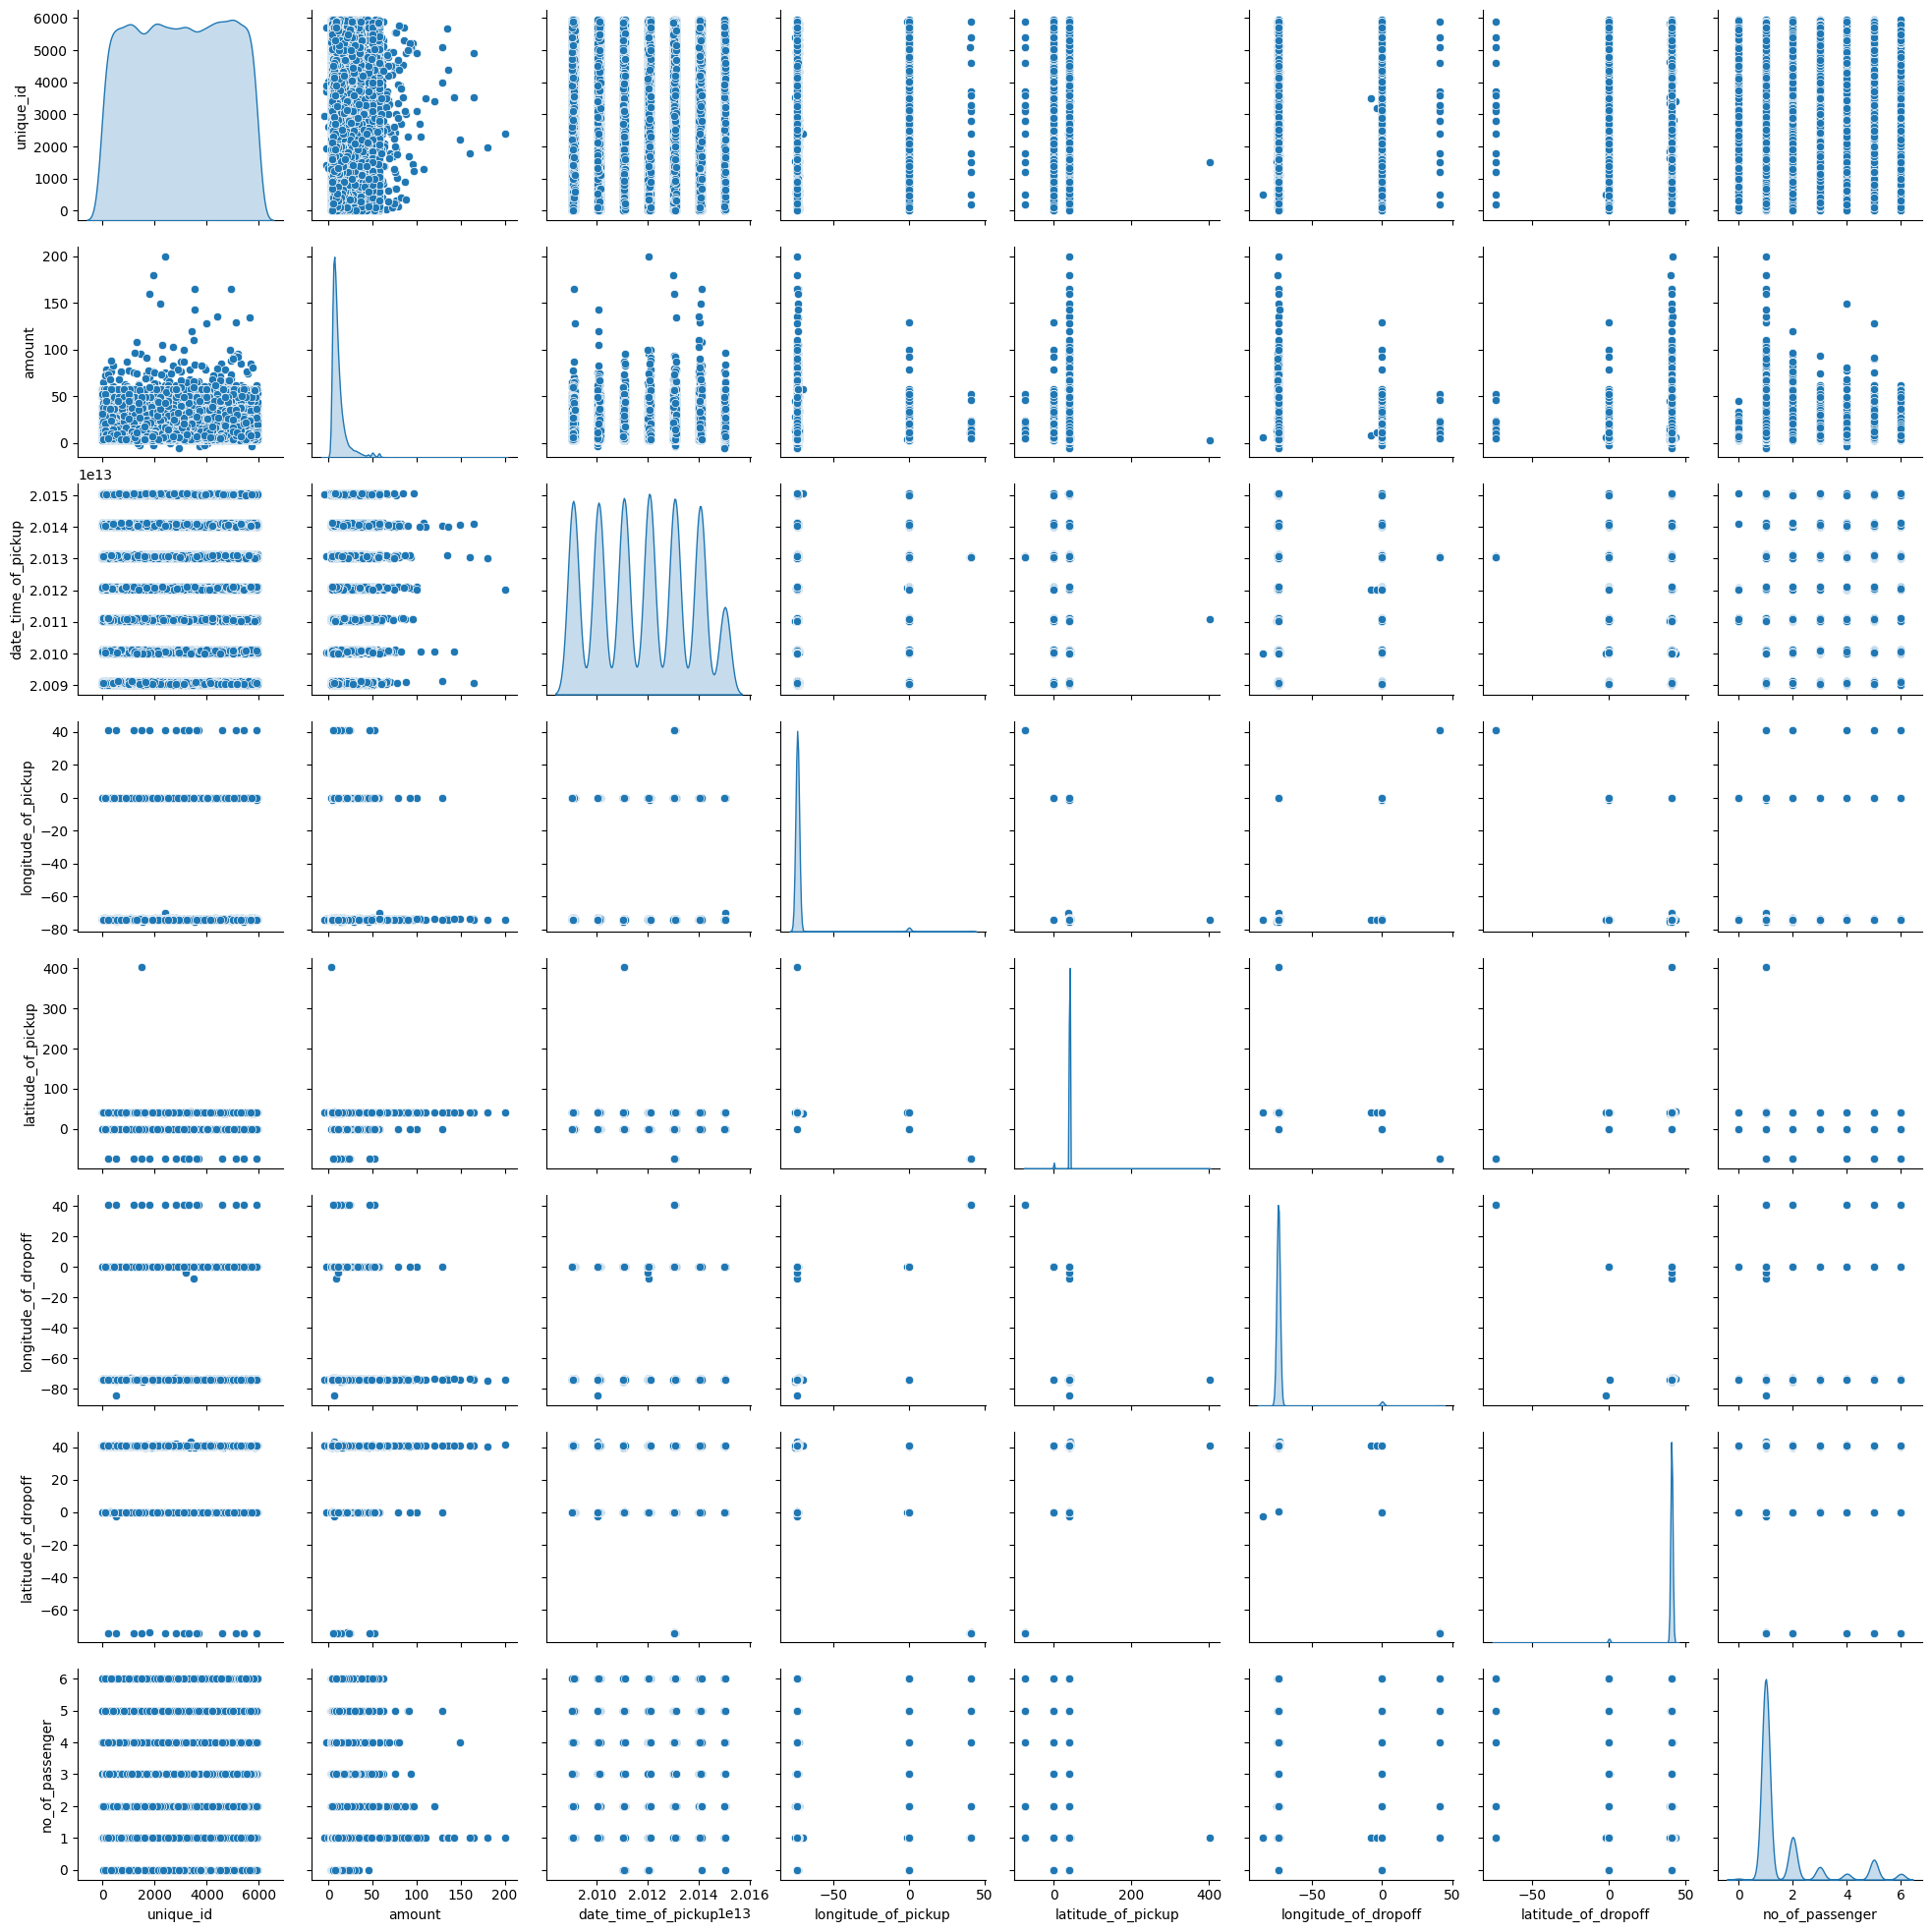

In [27]:
sns.pairplot(taxifare,diag_kind="kde")

In [29]:
 X=taxifare.drop(['latitude_of_dropoff'],axis=1)
 Y=taxifare[['latitude_of_dropoff']]

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [34]:
model_1=LinearRegression()
model_1.fit(X_train,Y_train)

LinearRegression()

In [35]:
model_1.score(X_train,Y_train)

0.9707985659229035

In [36]:
model_1.score(X_test,Y_test)


0.975862321303087